<a href="https://colab.research.google.com/github/J-Chaudhary/comSimRepo/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - 9 (CISC-614-51-A2019)#
Student : Jignesh Chaudhary (id: 197320)
---------------------
## Queuing Model: Dog Mushing Checkpoint ##
---------------------


In this report my goal is to implement basic queuing simulation algorithm using simple example of a checkpoint for a long distance dog slade race. The  The Iditarod sled-dog race is arguably the world’s most famous, beginning in early March, traversing approximately 1500 kilometers through harsh wilderness in 8-12 days.  

There are approximately 26 checkpoints on the route, where mushers stop to check their dogs for medical problems and feed them. In this report, we are going to focus on the village of Koyuk. 

Successive team reach at village of Koyuk explain that the team completed almost 80 % race. So mushers are in tough competetion to finish the race and do not wants to waste much time. In this scenario I decided to use reasonable parameters as follows.

This report devided in 2 different Tasks
$\textbf{Task-1}$ explains very simple test case, computes manually to verify that the model code computes the same solution.

$\textbf{Task-2}$ In this task I am running 1000 simulations with this model and plots outcums.

###Assumptions :
* We assume that dog teams can only be processed one at a time. 
* Dog teams arrive at the checkpoint and if no other team is in the queue, they are immediately “processed.”  Otherwise, they will have to wait their turn. 
* We define the time in the checkpoint as the waiting time plus the processing time. 
* The time between successive dog team arrivals  and Processing time are uniform random numbers.

$\textbf{Input Parameters to run simulations using this algorithm.}$

    * Dog teams arrives at Checkpoint (random uniform) between 15 to 90 minutes.
    * processing time for dog teams (random uniform) between 30 to 60 minutes.
    * Number of Teams = 50 


##Task-1
###Simple Test Case
In this test case we assume that there are 5 Dog Teams in rase.  Time between arrival is random uniform from 15 to 90 minutes and time of Processing is random uniform from 60 to 100 minutes for this test case as follows:

Teams = ['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5']

Time_Between_Arrival = [15, 45, 85, 60, 65]

Process_Time = [60, 65, 75, 90, 85]

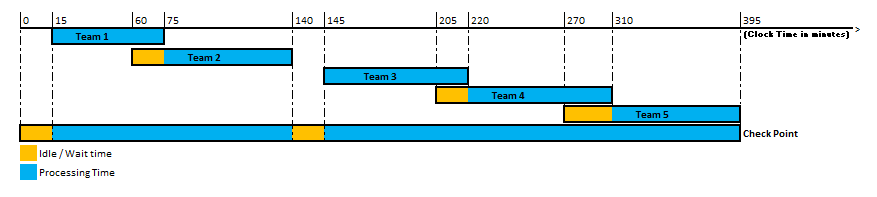

###Manual Computation process:

I am using Microsoft Excel for manual Computation. 

Team-1 arrives 15 min after the clock commences at $t=0$ min, the check point are idle for 15 min at the start. Team-1 immediately begin to process. The processing takes 60 min; meanwhile Team-2 arrives on the checkpoint at $t=15 + 45 = 60$ min after the clock begins. Team-2 can't stast to processed until Team-1 finishes processing at $t=15 + 60 = 75$. This means Team-2 must wait $75-60=15$ min before processing begins. Team-2 finish processing at $75 + 65 = 140$ and Team-3 arrive at $60 + 85 = 145$. Check point idle for 5 min befor start processing Team-3 and so on....

after finish  computatoin for all 5 teams, We can compute outputs as follows,

Max Wait Time = Max(Wait Time) # colum no-6 of below Table

Avg Wait Time = Sum(Max Wait Time) / Number of Teams

Max Check Point Time = Max(Time in Checkpoint) colum no-9 of below Table

Avg Check Point Time = Sum(Time in Checkpoint) / number of teams

Percent Idle Time = Sum(Checkpoint Idle Time)/finish time of team-5 * 100 

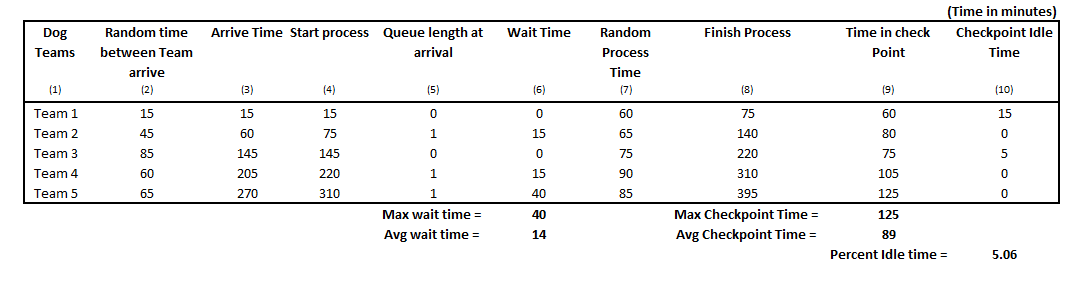

###Model codes for Test case

In [ ]:
import numpy as np

def TestSimulation(NumberOfTeam, Time_Between_Arrival, Process_Time):
    Arrive = np.zeros(NumberOfTeam)
    Start = np.zeros(NumberOfTeam)
    Finish = np.zeros(NumberOfTeam)
    Idle = np.zeros(NumberOfTeam)
    Wait = np.zeros(NumberOfTeam)
    CheckPoint = np.zeros(NumberOfTeam)
    MaxCheckpointTime = 0
    CheckpointTime = 0
    WaitTime = 0
    MaxWait = 0
    for i in range(NumberOfTeam):
        Between = Time_Between_Arrival[i]
        Process = Process_Time[i]
        Arrive[i] = Arrive[i-1] + Between
        timediff = Arrive[i] - Finish[i-1]
        if timediff > 0:
            Idle[i] = timediff
            Wait[i] = 0
        else:
            Wait[i] = -timediff
            Idle[i] = 0
        Start[i] = Arrive[i] + Wait [i]
        Finish[i] = Start[i] + Process
        CheckPoint[i] = Wait[i] + Process
        CheckpointTime += CheckPoint[i]
        if CheckPoint[i] > MaxCheckpointTime:
            MaxCheckpointTime = CheckPoint[i]
            WaitTime += Wait[i]
        if Wait[i] > MaxWait:
            MaxWait = Wait[i]
    AvgCheckpointTime = np.sum(CheckPoint) / NumberOfTeam
    IdleTime = (np.sum(Idle)/Finish[-1])*100
    AvgWaitTime = WaitTime / NumberOfTeam
    return AvgCheckpointTime, MaxCheckpointTime, AvgWaitTime, MaxWait, IdleTime

Between = [15, 45, 85, 60, 65]
Process = [60, 65, 75, 90, 85]
test = TestSimulation(NumberOfTeam=5, Time_Between_Arrival=Between, Process_Time=Process)
print(f'Average Check Point Time = {test[0]}, Maximum Check Point Time = {test[1]}\nAverage Wait Time = \
{test[2]}, Maximum Wait Time = {test[3]}\nPercent Idle Time = {test[-1]:2.2f}')

Average Check Point Time = 89.0, Maximum Check Point Time = 125.0
Average Wait Time = 14.0, Maximum Wait Time = 40.0
Percent Idle Time = 5.06


###We can verify that model code computes same results that we got from manual computation of test case with Microsoft Excel.

##Task-2
### Single Simulation Function 
With single simulation function we can specify following inputs as discussed in class. (all random uniform generated unites in minutes)

* Number of teams, ($1, 2, ...., n$)

* Between Time Low, (lower bond to generate random uniform time)

* Between Time High, (Upper bond to generate random uniform time)

* Process time Low, (lower bond to generate random uniform time) 

* Process Time High (Upper bond to generate random uniform time) 

###Outputs: (in minutes)
Average Checkpoint time, Maximum Checkpoint Time, Average Waiting Time, Maximum Waiting Time and percent Idle Time (%). 

we can use this function to perform $n$ number of simulations and we can plot results as I ploted in this assignment. 

                            Output : 1000 simulation for 50 teams                           
Between Time=random uniform(low=15, high=90),Processing Time=random uniform(low=30, high=60)
                                                                           (Time in minutes)


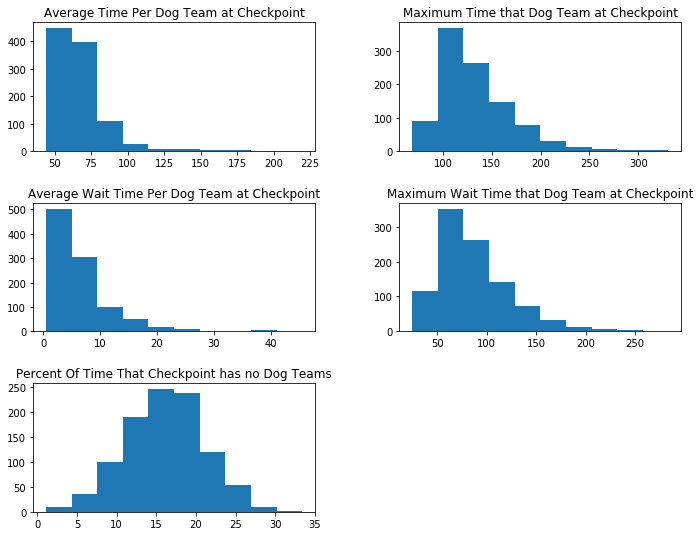

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def SingleSimulation(NumberOfTeam, BetweenTimeLow, BetweenTimeHigh, ProcessTimeLow, ProcessTimeHigh):
    Arrive = np.zeros(NumberOfTeam)
    Start = np.zeros(NumberOfTeam)
    Finish = np.zeros(NumberOfTeam)
    Idle = np.zeros(NumberOfTeam)
    Wait = np.zeros(NumberOfTeam)
    CheckPoint = np.zeros(NumberOfTeam)
    MaxCheckpointTime = 0
    CheckpointTime = 0
    WaitTime = 0
    MaxWait = 0
    for i in range(NumberOfTeam):
        Between=np.random.uniform(BetweenTimeLow, BetweenTimeHigh)
        Process=np.random.uniform(ProcessTimeLow, ProcessTimeHigh)
        Arrive[i] = Arrive[i-1] + Between
        timediff = Arrive[i] - Finish[i-1]
        if timediff > 0:
            Idle[i] = timediff
            Wait[i] = 0
        else:
            Wait[i] = -timediff
            Idle[i] = 0
        Start[i] = Arrive[i] + Wait [i]
        Finish[i] = Start[i] + Process
        CheckPoint[i] = Wait[i] + Process
        CheckpointTime += CheckPoint[i]
        if CheckPoint[i] > MaxCheckpointTime:
            MaxCheckpointTime = CheckPoint[i]
            WaitTime += Wait[i]
        if Wait[i] > MaxWait:
            MaxWait = Wait[i]
    AvgCheckpointTime = np.sum(CheckPoint) / NumberOfTeam
    IdleTime = (np.sum(Idle)/Finish[-1])*100
    AvgWaitTime = WaitTime / NumberOfTeam
    return AvgCheckpointTime, MaxCheckpointTime, AvgWaitTime, MaxWait, IdleTime



NumOfSim = 1000
Teams = 50
BetweenLow = 15
BetweenHigh = 90
ProcessLow = 30
ProcessHigh = 60

AvgCheckPointTime = np.zeros((NumOfSim))
MaxCheckPointTime = np.zeros((NumOfSim))
AvgWaitTime = np.zeros((NumOfSim))
MaxWaitTime = np.zeros((NumOfSim))
PercentIdleTime = np.zeros((NumOfSim))

for i in np.arange(NumOfSim):
    summery = SingleSimulation(NumberOfTeam=Teams, 
                               BetweenTimeLow=BetweenLow, 
                               BetweenTimeHigh=BetweenHigh, 
                               ProcessTimeLow=ProcessLow, 
                               ProcessTimeHigh=ProcessHigh)
    AvgCheckPointTime[i] = summery[0]
    MaxCheckPointTime[i] = summery[1]
    AvgWaitTime[i] = summery[2]
    MaxWaitTime[i] = summery[3]
    PercentIdleTime[i] = summery[4]
print('============================================================================================')
print('                            Output : 1000 simulation for 50 teams                           ')
print('Between Time=random uniform(low=15, high=90),Processing Time=random uniform(low=30, high=60)')
print('============================================================================================')
print('                                                                           (Time in minutes)')
plt.subplot(3,2,1)
plt.hist(AvgCheckPointTime)
plt.title('Average Time Per Dog Team at Checkpoint')
plt.subplot(3,2,2)
plt.hist(MaxCheckPointTime)
plt.title('Maximum Time that Dog Team at Checkpoint')
plt.subplot(3,2,3)
plt.hist(AvgWaitTime)
plt.title('Average Wait Time Per Dog Team at Checkpoint')
plt.subplot(3,2,4)
plt.hist(MaxWaitTime)
plt.title('Maximum Wait Time that Dog Team at Checkpoint')
plt.subplot(3,2,5)
plt.hist(PercentIdleTime)
plt.title('Percent Of Time That Checkpoint has no Dog Teams')
plt.subplots_adjust(left = .5, right = 2, bottom = .3, top = 2, wspace=.3, hspace=.4)
plt.show()